### Importação dos dados



In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Nova seção

#1. Análise do faturamento


In [75]:

faturamentos = {}
avaliacoes = {}
fretes = {}
categorias_mais_populares = {}
produtos_mais_vendidos = {}

for nome, df in lojas.items():
    faturamentos[nome] = df['Preço'].sum()
    avaliacoes[nome] = df['Avaliação da compra'].mean()
    fretes[nome] = df['Frete'].mean()
    categorias_mais_populares[nome] = df['Categoria do Produto'].value_counts().idxmax()
    produtos_mais_vendidos[nome] = df['Produto'].value_counts().idxmax()


melhor_faturamento = max(faturamentos, key=faturamentos.get)
melhor_avaliacao = max(avaliacoes, key=avaliacoes.get)
melhor_frete = min(fretes, key=fretes.get)




print("Faturamento Total por Loja:")
for nome, valor in faturamentos.items():
    destaque = "-> Loja com melhor faturamento <-" if nome == melhor_faturamento else ""
    print(f"{nome}: R${valor:,.2f} {destaque}")




Faturamento Total por Loja:
Loja 1: R$1,534,509.12 -> Loja com melhor faturamento <-
Loja 2: R$1,488,459.06 
Loja 3: R$1,464,025.03 
Loja 4: R$1,384,497.58 


# 2. Vendas por Categoria


In [65]:
print("\nCategoria Mais Popular por Loja:")
for nome, df in lojas.items():
    categoria_popular = categorias_mais_populares[nome]
    print(f"{nome}: {categoria_popular}")



Categoria Mais Popular por Loja:
Loja 1: moveis
Loja 2: moveis
Loja 3: moveis
Loja 4: moveis


# 3. Média de Avaliação das Lojas

In [63]:
print("\nMédia das Avaliações dos Clientes por Loja:")
for nome, media in avaliacoes.items():
    destaque = "-> Melhor avaliado <-" if nome == melhor_avaliacao else ""
    print(f"{nome}: {media:.2f} {destaque}")


Média das Avaliações dos Clientes por Loja:
Loja 1: 3.98 
Loja 2: 4.04 
Loja 3: 4.05 -> Melhor avaliado <-
Loja 4: 4.00 


# 4. Produtos Mais e Menos Vendidos

In [60]:
print("\n🏆 Produto Mais Vendido por Loja:")
for nome, produto in produtos_mais_vendidos.items():
    print(f"{nome}: {produto}")

print("\n📉 Produto Menos Vendido por Loja:")
for nome, df in lojas.items():
    produto_menos = df['Produto'].value_counts().idxmin()
    print(f"{nome}: {produto_menos}")


🏆 Produto Mais Vendido por Loja:
Loja 1: Micro-ondas
Loja 2: Iniciando em programação
Loja 3: Kit banquetas
Loja 4: Cama box

📉 Produto Menos Vendido por Loja:
Loja 1: Headset
Loja 2: Jogo de tabuleiro
Loja 3: Blocos de montar
Loja 4: Guitarra


# 5. Frete Médio por Loja


In [77]:
# =========================
# 5. Custo Médio de Frete por Loja
# =========================
print(" Custo Médio de Frete por Loja:")
for nome, frete in fretes.items():
    destaque = "-> melhor frete <-" if nome == melhor_frete else ""
    print(f"{nome}: R${frete:.2f} {destaque}")


 Custo Médio de Frete por Loja:
Loja 1: R$34.69 
Loja 2: R$33.62 
Loja 3: R$33.07 
Loja 4: R$31.28 -> melhor <-


# 6. Relatório final


#Análise das Lojas: Por que a Loja 4 é a Melhor Opção para Manter

Entre as lojas avaliadas, a Loja 1 se destaca por ter o maior faturamento, principalmente devido às vendas de micro-ondas, que costumam ser mais caros que outros produtos. No entanto, ela vende menos headsets em comparação às demais. Outro ponto negativo é o frete mais caro e a avaliação dos clientes, que está muito abaixo do esperado.

Já a Loja 4 apresenta vantagens significativas: frete mais barato, boa avaliação dos clientes e um volume relevante de vendas de cama box – um produto de valor alto, muitas vezes superior ao micro-ondas. Apesar de a Loja 1 faturar mais no momento, os indicadores de satisfação do cliente e os custos logísticos sugerem que a Loja 4 tem maior potencial para gerar resultados sustentáveis a longo prazo.

Portanto, acredito que a decisão mais estratégica seja fechar a Loja 1 e investir na Loja 4, aproveitando seus diferenciais para impulsionar o faturamento e a satisfação dos clientes na região.

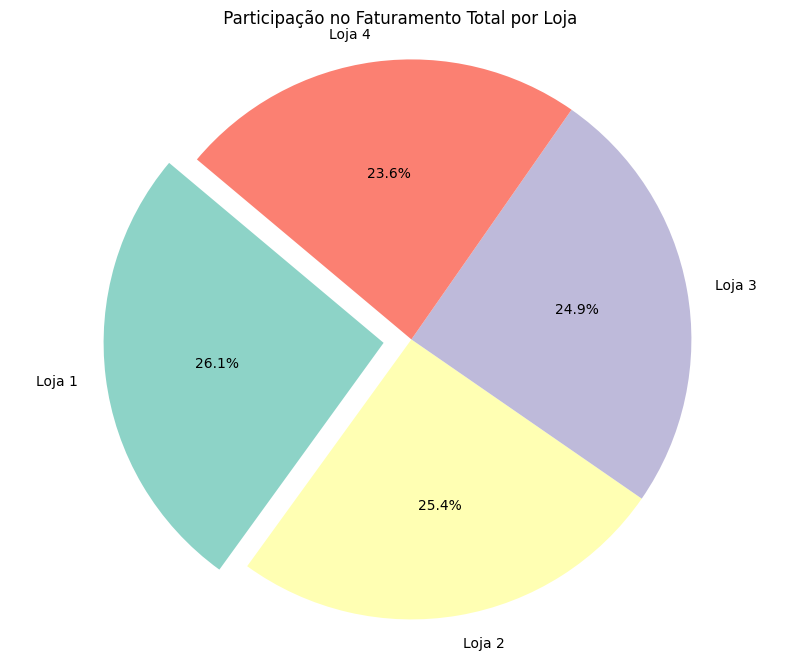

In [102]:
import matplotlib.pyplot as plt

faturamentos = {
    'Loja 1': 153450912,
    'Loja 2': 148845906 ,
    'Loja 3': 146402503 ,
    'Loja 4': 138449758
}

labels = list(faturamentos.keys())
sizes = list(faturamentos.values())
explode = [0.1 if loja == 'Loja 1' else 0 for loja in labels]

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        explode=explode, colors=plt.cm.Set3.colors)
plt.title(' Participação no Faturamento Total por Loja')
plt.axis('equal')
plt.show()


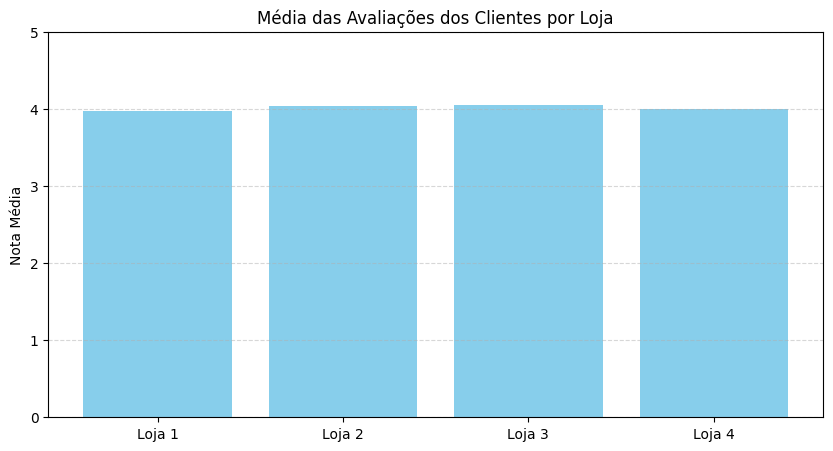

In [101]:
avaliacoes = {
    'Loja 1': 3.98,
    'Loja 2': 4.04,
    'Loja 3': 4.05,
    'Loja 4': 4.00
}

plt.figure(figsize=(10, 5))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color='skyblue')
plt.title('Média das Avaliações dos Clientes por Loja')
plt.ylabel('Nota Média')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

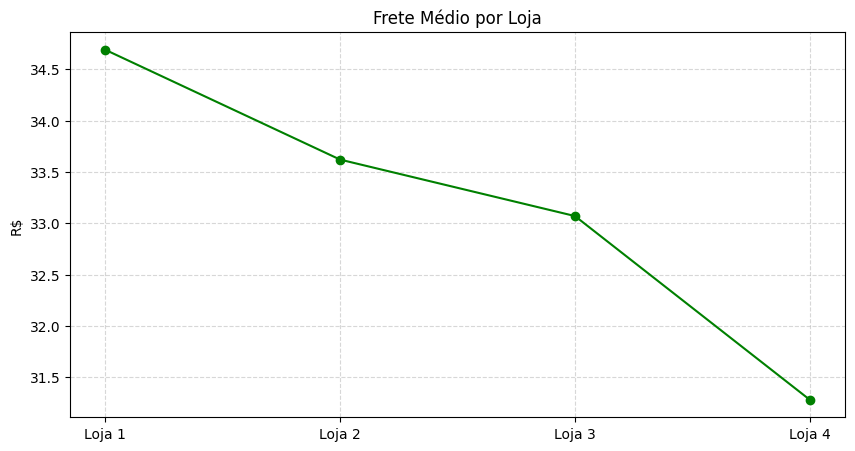

In [100]:
fretes = {
    'Loja 1': 34.69,
    'Loja 2': 33.62,
    'Loja 3': 33.07,
    'Loja 4': 31.28
}


plt.figure(figsize=(10, 5))
plt.plot(list(fretes.keys()), list(fretes.values()), marker='o', linestyle='-', color='green')
plt.title('Frete Médio por Loja')
plt.ylabel('R$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()